In [3]:
!pip install apimoex

In [1]:
!pip install yfinance

In [4]:
import requests
import yfinance as yf
import apimoex
import pandas as pd

In [ ]:
with requests.Session() as session:
  data_h = apimoex.get_market_candles(session, 'SBER', 24)
  df_h = pd.DataFrame(data_h)
  print(df_h)

In [5]:
gld = yf.Ticker("GC=F")

# Получение исторических данных за последний год
hist_data = gld.history(interval='1d', start="1999-12-01")

# Вывод первых строк данных
hist_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-08-30 00:00:00-04:00,273.899994,273.899994,273.899994,273.899994,0,0.0,0.0
2000-08-31 00:00:00-04:00,274.799988,278.299988,274.799988,278.299988,0,0.0,0.0
2000-09-01 00:00:00-04:00,277.000000,277.000000,277.000000,277.000000,0,0.0,0.0
2000-09-05 00:00:00-04:00,275.799988,275.799988,275.799988,275.799988,2,0.0,0.0
2000-09-06 00:00:00-04:00,274.200012,274.200012,274.200012,274.200012,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-12-19 00:00:00-05:00,4350.100098,4361.399902,4350.100098,4361.399902,1065,0.0,0.0
2025-12-22 00:00:00-05:00,4371.100098,4447.600098,4371.100098,4444.600098,449,0.0,0.0
2025-12-23 00:00:00-05:00,4503.299805,4503.799805,4450.399902,4482.799805,694,0.0,0.0


In [10]:
ex = hist_data['Close'][10:21]
(ex[3:].values/ex[:-3].values)-1

array([-0.00183554, -0.01211894, -0.00405308, -0.0003678 ,  0.01895913,
        0.01331856,  0.02428258,  0.00547246])

In [11]:
ex

,Close
Date,
2000-09-14 00:00:00-04:00,272.399994
2000-09-15 00:00:00-04:00,272.299988
2000-09-18 00:00:00-04:00,271.399994
2000-09-19 00:00:00-04:00,271.899994
2000-09-20 00:00:00-04:00,269.000000
2000-09-21 00:00:00-04:00,270.299988
2000-09-22 00:00:00-04:00,271.799988
2000-09-25 00:00:00-04:00,274.100006
2000-09-26 00:00:00-04:00,273.899994


In [ ]:
df_h = hist_data['Close']
df_h = df_h.rolling(9).mean()[9:]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df_h, test_size=0.2, shuffle=False)

In [ ]:
X_train, X_test = pd.DataFrame(X_train), pd.DataFrame(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import datasets

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
np.sign(5).item()

1

In [ ]:
np.array([[1]])

array([[1]])

In [ ]:
X_train_sc[1:5]

array([[-1.51723645],
       [-1.51833314],
       [-1.51935983],
       [-1.51989651]])

In [ ]:
def make_roll_data(data, original, window, horizon, treshold):
  dataset = []
  for i in range(window, (len(data)//window)*window-horizon):
    d = dict()
    d['args'] = data[i-window:i]
    cur_price = original['Close'].to_numpy()[i-1]
    fut_price = original['Close'].to_numpy()[i+horizon]
    dif = ((fut_price-cur_price)/cur_price)*100
    if dif>treshold: d['target'] = np.sign(dif)
    else: d['target'] = 0
    dataset.append(d)
  vec_dim = len(data[i])
  return dataset, vec_dim
train_data, vec_dim = make_roll_data(X_train_sc, X_train, 100, 7, 2)
test_data, _ = make_roll_data(X_test_sc, X_test, 100, 7, 2)

In [ ]:
class MyDataset(Dataset):
  def __init__(self, dataset):
    self.dataset = dataset

  def __getitem__(self, ind):
    return self.dataset[ind]

  def __len__(self):
    return len(self.dataset)


In [ ]:
def collate_fn(input_batch):
  new_batch = []
  targets = []
  for d in input_batch:
    new_batch.append(d['args'])
    targets.append(d['target'])
  new_batch = torch.tensor(new_batch, dtype=torch.float32).to(device)
  targets = torch.LongTensor(targets).to(device)
  return new_batch, targets

In [ ]:
train_dataset = MyDataset(train_data)
test_dataset = MyDataset(test_data)

train_dataloader = DataLoader(train_dataset, shuffle=False, collate_fn=collate_fn, batch_size=16)
test_dataloader = DataLoader(test_dataset, shuffle=False, collate_fn=collate_fn, batch_size=16)

In [ ]:
class MultiHeadAttentionLayer(nn.Module):
  def __init__(self, hid_dim, n_heads, dropout, device):
    super().__init__()
    self.hid_dim = hid_dim
    self.n_heads = n_heads
    self.head_dim = self.hid_dim//self.n_heads
    self.fc_q = nn.Linear(hid_dim, hid_dim)
    self.fc_k = nn.Linear(hid_dim, hid_dim)
    self.fc_v = nn.Linear(hid_dim, hid_dim)
    self.dropout = nn.Dropout(dropout)
    self.scale = torch.sqrt(torch.FloatTensor([self.head_dim])).to(device)
    self.fc = nn.Linear(hid_dim, hid_dim)

  def forward(self, query, key, value):
    batch_size = query.shape[0]
    q = self.fc_q(query) #(batch_size; window, hid_dim)
    k = self.fc_q(key)
    v = self.fc_q(value)

    q = q.view(batch_size, -1, self.n_heads, self.head_dim).permute(0,2,1,3) #(batch_size, n_heads, window, head_dim)
    k = k.view(batch_size, -1, self.n_heads, self.head_dim).permute(0,2,1,3)
    v = v.view(batch_size, -1, self.n_heads, self.head_dim).permute(0,2,1,3)

    attention = torch.matmul(q, k.permute(0,1,3,2))/self.scale #(batch_size, n_heads, window, window)

    attention = torch.softmax(attention, dim=-1)

    x = torch.matmul(self.dropout(attention), v) #(batch_size, n_heads, window, head_dim)
    x = x.permute(0,2,1,3).contiguous()
    x = x.view(batch_size, -1, self.hid_dim)
    x = self.fc(x)
    return x, attention



In [ ]:
next(iter(train_dataloader))[0].shape

torch.Size([16, 100, 1])

In [ ]:
class Model(nn.Module):
  def __init__(self, vec_dim, hidden_dim, num_classes, n_heads, device):
    super().__init__()
    self.linear1 = nn.Linear(vec_dim, hidden_dim)
    self.mha = MultiHeadAttentionLayer(hidden_dim, n_heads, 0, device)
    self.classifier = nn.Linear(hidden_dim, 3)

  def forward(self, x):
    x = self.linear1(x)
    x, attention = self.mha(x,x,x)
    x = self.classifier(x[:, -1, :].squeeze())
    return x

MSE/MAE:

In [ ]:
next(iter(train_dataloader))[1].dtype

torch.float32

In [ ]:
def train_one_epoch(model, criterion, optimizer):
  model.train()
  losses = []
  for inputs, targets in tqdm(train_dataloader):
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
  epoch_loss = sum(losses)/len(losses)
  return epoch_loss

def evaluate_one_epoch(model, criterion):
  model.eval()
  with torch.no_grad():
    losses = []
    right = 0
    count = 0
    # metrics = []
    for inputs, targets in tqdm(test_dataloader):
      outputs = model(inputs)
      answers = outputs.argmax(axis = -1)
      loss = criterion(outputs, targets)
      # metric = METRIC(outputs, targets)
      losses.append(loss.item())
      # metrics.append(metric.item())
      right+=(answers==targets).sum().item()
      count+=targets.shape[0]
    epoch_loss = sum(losses)/len(losses)
    # epoch_metrics = sum(metrics)/len(metrics)
    return epoch_loss, right/count

def train(model, criterion, optimizer, epochs, scheduler):
  train_losses = []
  eval_losses = []
  metrics = []
  lrs = []
  for epoch in tqdm(range(epochs)):
    train_losses.append(train_one_epoch(model, criterion, optimizer))
    eval_loss, metric = evaluate_one_epoch(model, criterion)
    eval_losses.append(eval_loss)
    metrics.append(metric)
    scheduler.step(eval_loss)
    lrs.append(optimizer.param_groups[0]['lr'])
    print(f'{epoch} epoch:\ntrain:{train_losses[-1]}, eval:{eval_loss}, metric:{metric}')
  return train_losses, eval_losses, metrics, lrs


In [ ]:
def visualisation(train_losses, eval_losses, metrics):
  model.eval()
  with torch.no_grad():
    plt.figure(figsize=(6,12))
    plt.subplot(211)
    plt.plot(np.arange(len(train_losses)), train_losses, 'b', label = 'train')
    plt.plot(np.arange(len(eval_losses)), eval_losses, 'r', label = 'test')
    plt.subplot(212)
    plt.plot(np.arange(len(metrics)), metrics, label = 'metrics')
    plt.legend()
    plt.show()

In [ ]:
from tqdm.auto import tqdm

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/306 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

0 epoch:
train:0.5662508509030529, eval:0.6849988832853843, metric:0.7136322049405307


  0%|          | 0/306 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

1 epoch:
train:0.5453227791764768, eval:0.5600609913252402, metric:0.7666971637694419


  0%|          | 0/306 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

2 epoch:
train:0.5414457117615182, eval:0.5584227481613988, metric:0.7666971637694419


  0%|          | 0/306 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

3 epoch:
train:0.5373146072322247, eval:0.5613424149544343, metric:0.7666971637694419


  0%|          | 0/306 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

4 epoch:
train:0.5362184157266336, eval:0.5590739206991334, metric:0.7666971637694419


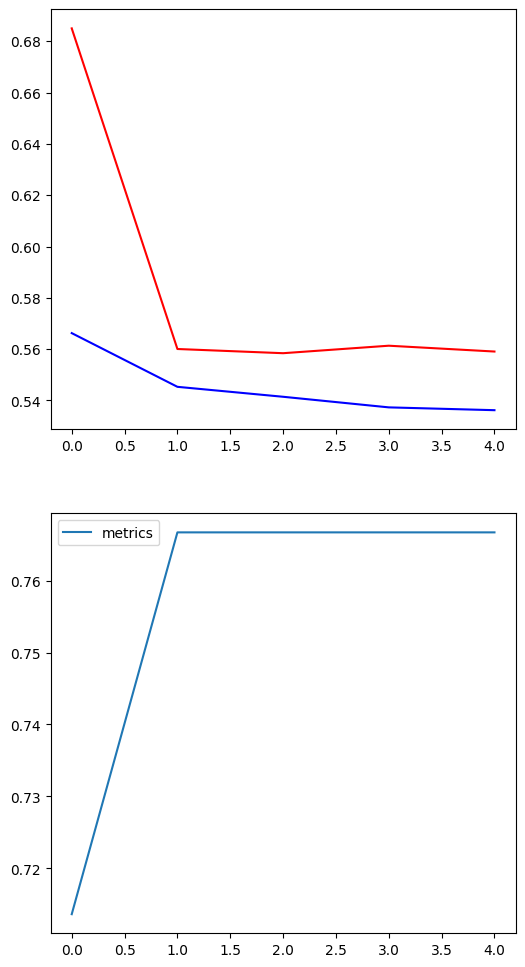

In [ ]:
model = Model(vec_dim, 8, 3, 2, device).to(device)
criterion = nn.CrossEntropyLoss()
optimizer =  torch.optim.Adam(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.8,
    patience=3,
    threshold=1e-4
)
epochs = 5
train_losses, eval_losses, metrics, lrs = train(model, criterion, optimizer, epochs, scheduler)
visualisation(train_losses, eval_losses, metrics)


In [ ]:
print(lrs)

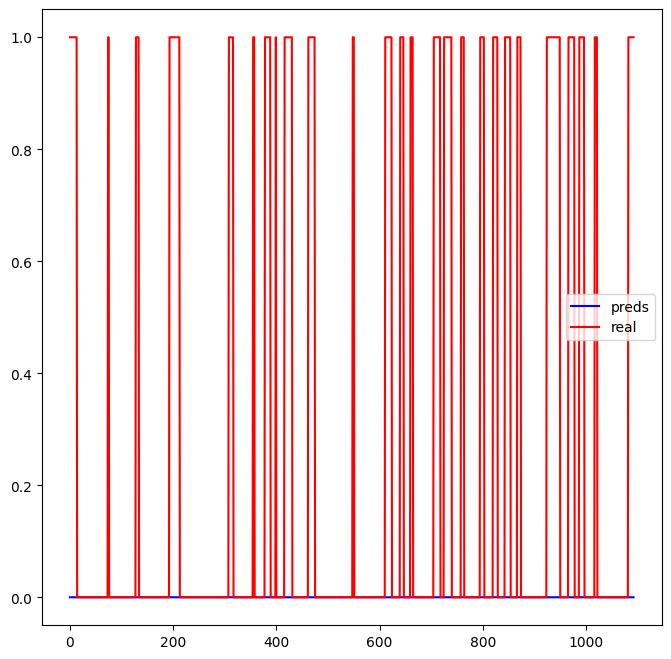

In [ ]:
model.eval()
with torch.no_grad():
  preds = []
  real = []
  for inputs, targets in test_dataloader:
    outputs = model(inputs).detach().cpu()
    answers = outputs.argmax(axis = -1)
    preds.extend([i.item() for i in answers])
    real.extend([i.item() for i in targets])
  plt.figure(figsize=(8,8))
  plt.plot(np.arange(len(preds)), preds, 'b', label='preds')
  plt.plot(np.arange(len(real)), real, 'r', label='real')
  plt.legend()
  plt.show()
